# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, DD.MM.YYYY

### Author:

**(1) Give one example of each of the following type of data.**

(a) Analog: Sound
(b) Digital: image file， composed of pixels
(c) Primary: Measured temperature from a thermometer
(d) Secondary (i.e., lack of data that is informative): a weather forecast for a city that simply states rainy or sunny. It could be useful for making decisions of outdoor activities.
(e) Metadata: Music metadata: Information about a music file such as the title, artist, album, genre, and release date.
(f) Environmental: The observation and records of the presence of certain species in an ecosystem in a geographical area.

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

 The stock market data.

(a) Information: The stock market data can be used to understand the performance of a company, and the state of the economy, and make predictions about future market trends.

(b) Redundancy: The stock market data may contain repetitive patterns and fluctuations that do not carry significant information and are not useful for making predictions about future market trends.

(c) Not interpretable: The stock market data may contain certain patterns or correlations that are not well understood, and the reasons for which are not immediately clear, therefore these patterns are not interpretable, and their significance is not known.

**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). What measuring station was used? Compare the solar radiation in those 3 days and provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-03-01 00:00:00 to 2021-03-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-07-01 00:00:00 to 2021-07-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Direct solar radiation (W/m2)  1441 non-null   object
dtypes: object(1)
memory usage: 22.5+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-12-01 00:00:00 to 2021-12-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct sol

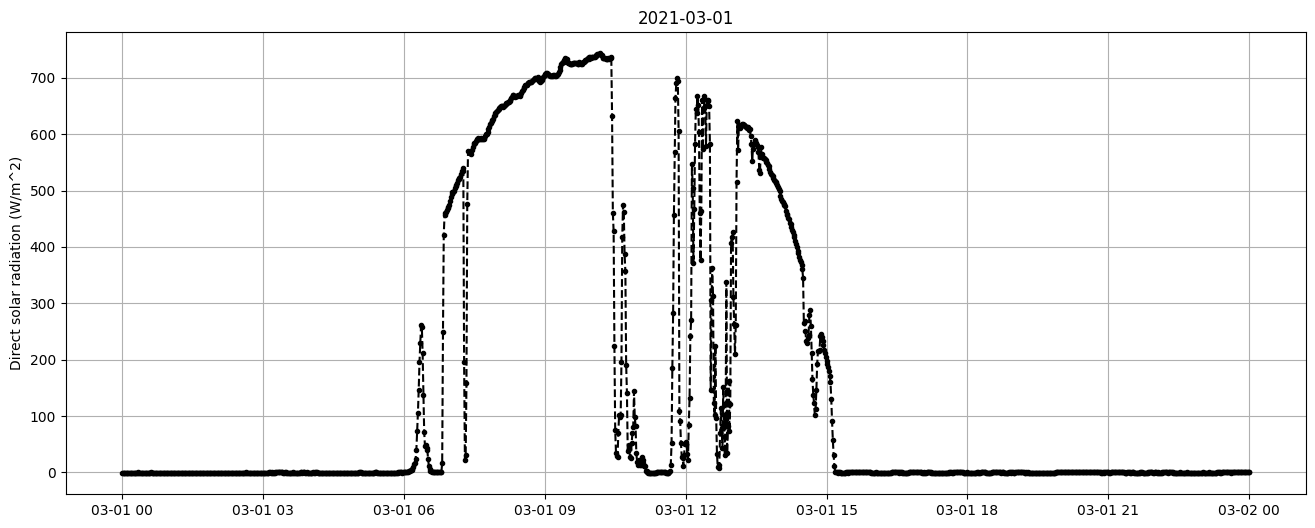

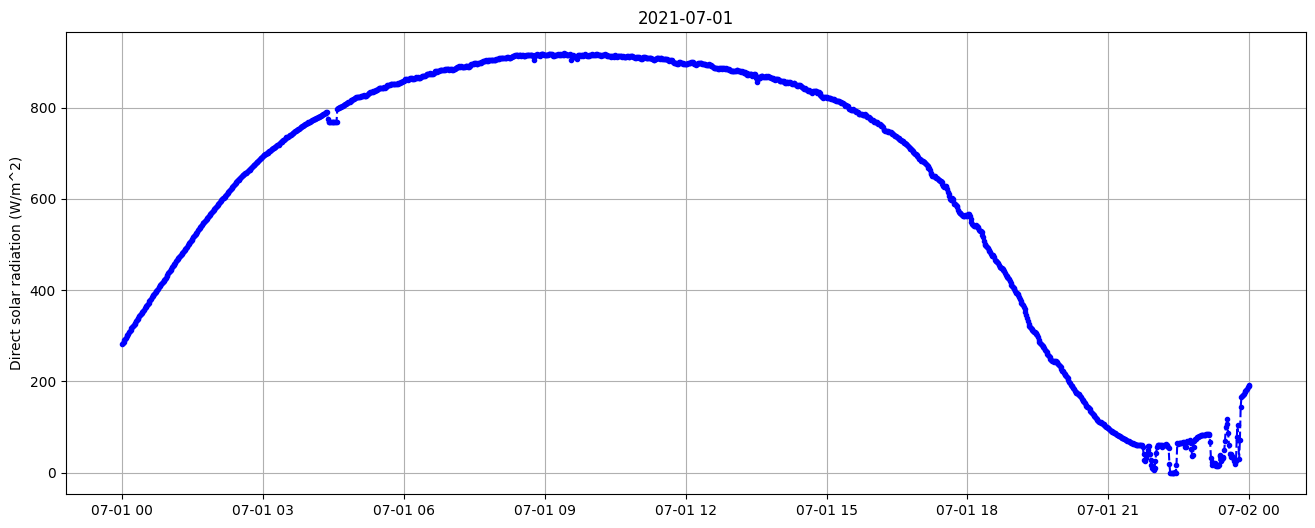

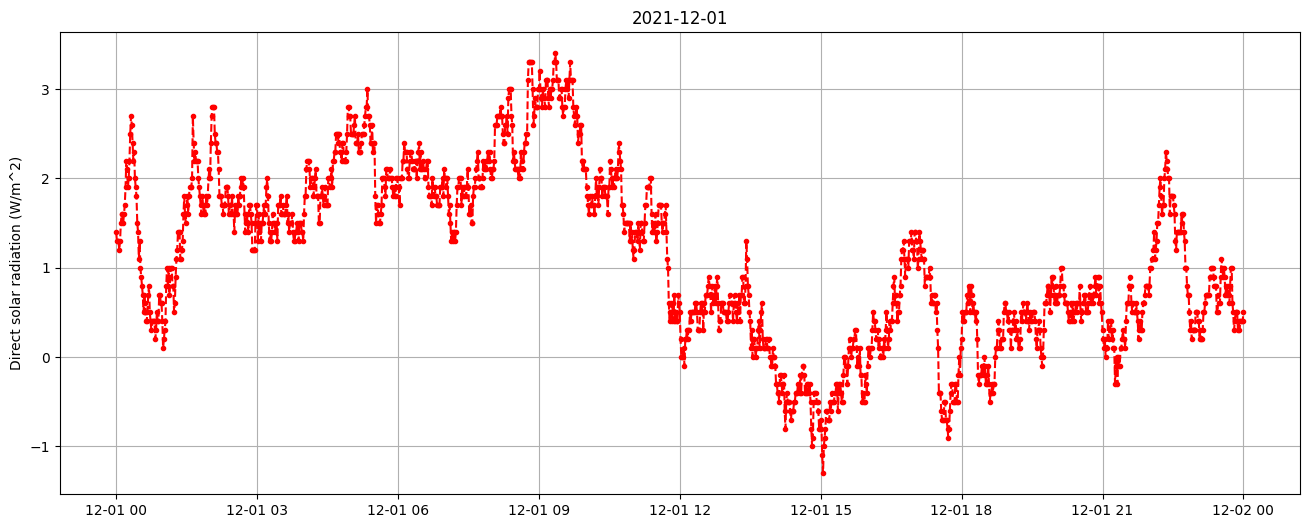

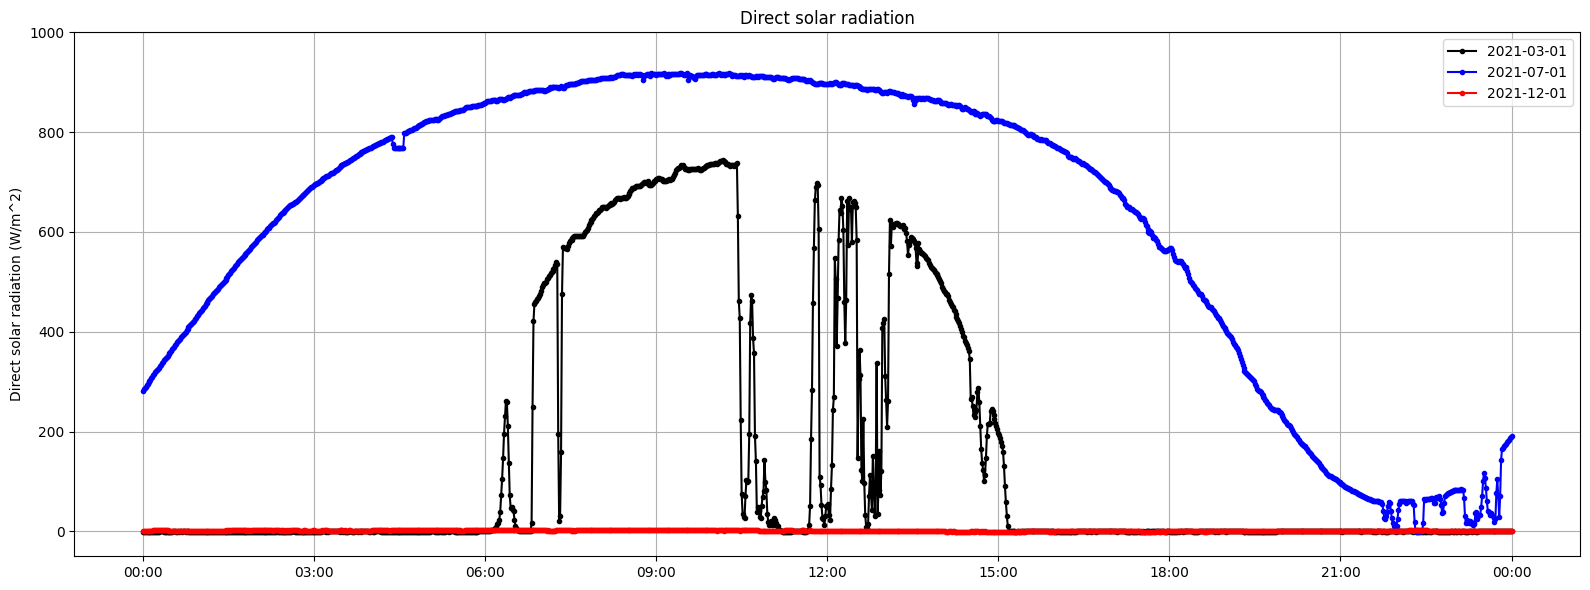

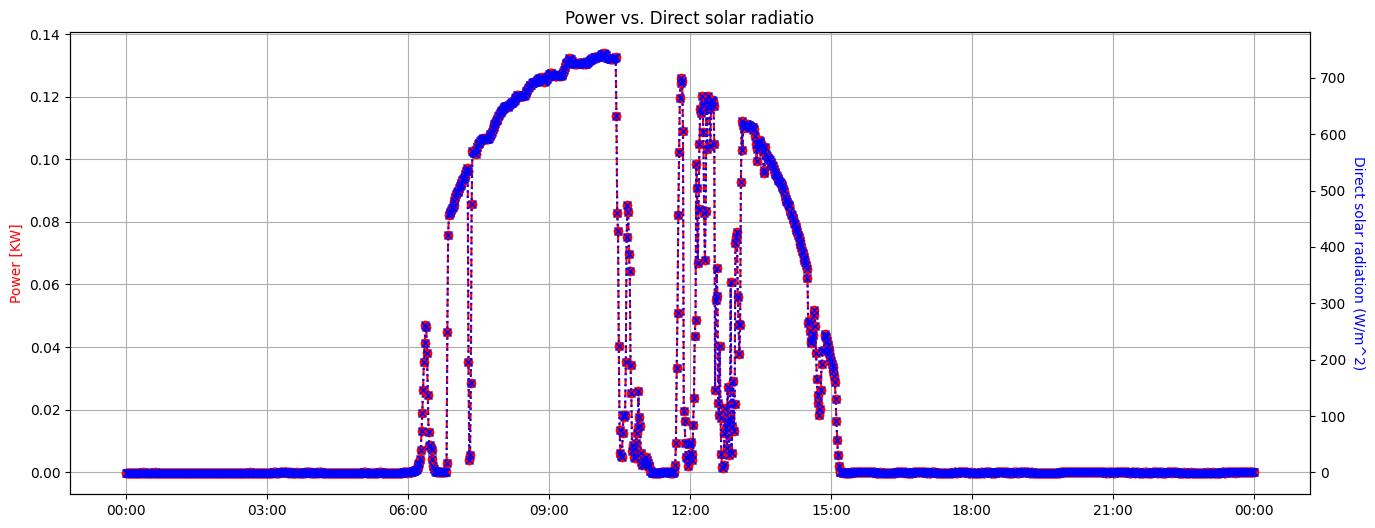

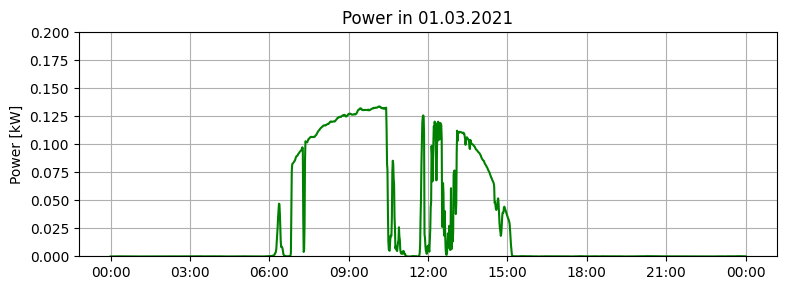

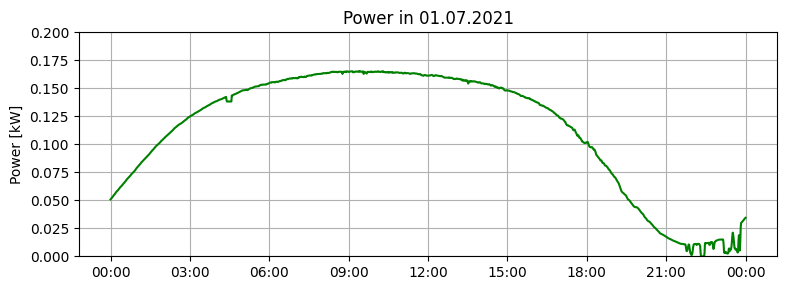

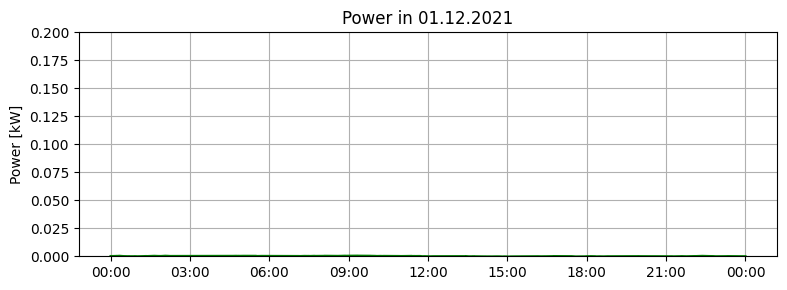

In [30]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/

#http://en.ilmatieteenlaitos.fi/download-observations#!/
#Note parse_dates to combine the 5 first columns, also note that the separator from 
#decimal is "." and data separator is ","
#Uploading datasets from Direct Solar Radiation in Tähtelä(99600) - Sodankylä Tähtelä station

dsr_20210301 = pd.read_csv("ST_20210301.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
dsr_20210301.info()

dsr_20210701 = pd.read_csv("ST_20210701.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
dsr_20210701.info()
len(dsr_20210701[dsr_20210701['Direct solar radiation (W/m2)'].str.contains('-')])
dsr_20210701 = dsr_20210701.replace('-',method='bfill')
dsr_20210701 = dsr_20210701['Direct solar radiation (W/m2)'].astype(float)

dsr_20211201 = pd.read_csv("ST_20211201.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
dsr_20211201.info()

#Ploting each day
#Day1
day1 = '2021-03-01'
plt.figure(figsize=(16,6)) 
plt.plot(dsr_20210301,color='black', marker='.',linestyle='--') 
plt.title(day1) 
plt.ylabel("Direct solar radiation (W/m^2)") 
plt.grid(True) 
plt.show() 

#Day2
day2 = '2021-07-01'
plt.figure(figsize=(16,6)) 
plt.plot(dsr_20210701, color='blue', marker='.',linestyle='--') 
plt.title(day2) 
plt.ylabel("Direct solar radiation (W/m^2)") 
plt.grid(True) 
plt.show() 

#Day3
day3 = '2021-12-01'
plt.figure(figsize=(16,6)) 
plt.plot(dsr_20211201,color='red', marker='.',linestyle='--') 
plt.title(day3) 
plt.ylabel("Direct solar radiation (W/m^2)") 
plt.grid(True) 
plt.show() 

#Three together with improved visualization
#Difference
delta1 = dsr_20210301.index[0].date() - dsr_20210701.index[0].date()
#
delta2 = dsr_20210301.index[0].date() - dsr_20211201.index[0].date()

fig, ax = plt.subplots(1,figsize=(16,6))
#
plt.plot(dsr_20210301.index, dsr_20210301.values, label=day1, color='black', 
         marker='.',linestyle='-')
#
plt.plot(dsr_20210701.index + pd.offsets.Day(delta1.days), 
         dsr_20210701.values, label=day2, color='blue', marker='.',linestyle='-')
#
plt.plot(dsr_20211201.index + pd.offsets.Day(delta2.days), 
         dsr_20211201.values, label=day3, color='red', marker='.',linestyle='-')
#
plt.legend()
plt.ylim([-50, 1000])
plt.title("Direct solar radiation") 
plt.ylabel("Direct solar radiation (W/m^2)") 
plt.grid(True)
plt.tight_layout()
#change x ticks
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

#let's take 2021-03-01 as example
#Calculating the potential of solar generation based on direct solar radiation involves 
#determining the amount of solar radiation that falls on a given area, 
#and then multiplying that by the efficiency of the solar cells. 
#P=D*A*c
#where P is potential of solar generation,A is the area of solar panels, c is efficiency of the solar cells.
#Here we consider A equals 1 square meter; c usually round 0.15-0.2
#Then P≈0.18*D/1000 (KW)

#subplot function
fig, ax1 = plt.subplots(figsize=(16,6))
ax1.set_ylabel("Power [KW]", color='red')
ax1.plot( 0.18*(dsr_20210301)/1000,color='red', marker='o',linestyle='--') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Direct solar radiation (W/m^2)", color='blue',rotation=270,va="bottom")  
ax2.plot(dsr_20210301,color='blue', marker='x',linestyle=':')
#
ax1.grid(True)
plt.title("Power vs. Direct solar radiatio") #title     
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

#It is important to note that this is an example and the actual solar radiation, solar cell efficiency and area of the solar panel may vary.
#Additionally, these calculations are based on the assumption that 
#the solar panel will be operating at its optimal efficiency, 
#which may not always be the case due to factors such as shading, dust accumulation, and temperature.

#potential solar energy produced per square meter in Tähtelä on 2021-03-01
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.18*(dsr_20210301)/1000,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 0.2])
plt.title("Power in 01.03.2021") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show()

#potential solar energy produced per square meter in Tähtelä on 2021-07-01
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.18*(dsr_20210701)/1000,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 0.2])
plt.title("Power in 01.07.2021") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show()

#potential solar energy produced per square meter in Tähtelä on 2021-12-01
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.18*(dsr_20211201)/1000,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 0.2])
plt.title("Power in 01.12.2021") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show()


**(4) Read the text [What Does the Metaverse Mean for the Future of Energy Consumption?](https://earth.org/metaverse-energy-consumption/). Write a brief analysis of the text based on the relation between data, energy and level of processes. From the energy perspective, is it possible to maintain this kind of technologies? Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

The text discusses the potential impact of the metaverse on energy consumption. The metaverse is a virtual world that is created and maintained by computer technology. The article suggests that as the metaverse becomes more prevalent and sophisticated, it will require increasingly large amounts of data and energy to support it.

According to the book "Information: A Very Short Introduction," the amount of energy required to process and transmit data increases as the amount of data and the complexity of the processing increases. This is because the amount of energy required to perform a computation is directly proportional to the number of operations required to perform that computation.

In terms of the metaverse, this means that as the virtual world becomes more realistic and immersive, it will require more data and energy to support it. This could potentially have a significant impact on energy consumption. However, it is important to note that the future of energy consumption is uncertain, and it is not possible to predict with certainty whether or not it will be possible to maintain these technologies from an energy perspective.

In conclusion, the article suggest that the metaverse has the potential to greatly increase energy consumption, due to the amount of data and energy required to support it. It is difficult to say for certain without more information about the specific energy consumption of the current metaverse technology. However, it is clear that data processing and symbolic reality always require energy and that the amount of energy needed increases as data processing increases. In the context of the metaverse, a highly immersive and interactive digital world, a significant amount of energy would likely be required to maintain and operate the technology.

Additionally, the number of informative combinations of data is limited, and the structure required by the acquired data to become information limits even more the boundaries that a trustworthy symbolic reality can be constructed. It is unclear how these limitations will impact the long-term sustainability of the metaverse technology from an energy perspective.

Overall, it's possible that the metaverse technology may require a significant amount of energy to maintain, and it may be challenging to overcome the limitations of energy consumption. It's important to consider energy efficiency and sustainable energy sources in the development and implementation of this technology.